In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
import openpyxl
import pymysql
import pymysql.cursors





In [46]:
data = './Data/Seoul_shut_down.xlsx'

seoul_df = pd.read_excel(data)


In [47]:
seoul_df

,year,agriculture_forestry_fishing,mining,manufacturing,utilities,wholesale,retail,real_estate_sales,construction,food_service,accommodation,transportation_storage_communications,real_estate_rental,agency_brokerage_contracting,service_industry
0,2015,38,3,7057,26,17527,31539,480,7484,28159,704,9006,25618,3089,41348
1,2016,66,17,8351,27,21399,36029,763,9293,29543,769,9262,33229,3794,47762
2,2017,64,11,7890,37,20081,35537,847,8757,28473,762,9754,31234,3912,49150
3,2018,45,12,7404,61,18433,33809,874,7851,27268,826,9028,28593,4040,48549
4,2019,58,10,7282,88,17389,37118,1122,7743,26727,869,9212,27417,3969,49411
5,2020,57,9,6088,96,14538,37284,1091,6682,23752,988,8146,35484,3281,45890
6,2021,56,9,5739,80,12992,41904,938,6503,22016,835,8576,35834,2698,44058
7,2022,55,7,5234,66,11958,44321,873,5899,22146,929,8124,27770,2694,44181
8,2023,64,9,6168,47,13224,56286,978,6195,25314,980,8861,21769,2990,50706


In [48]:
def create_table(conn,cur):
	try: 
		qurey_Drop ="DROP TABLE IF EXISTS seoul_shut_down"
		qurey1 = '''
				CREATE TABLE seoul_shut_down
					(year INT PRIMARY KEY,
					agriculture_forestry_fishing INT,
					mining INT, 
					manufacturing INT,
					utilities INT,
					wholesale INT,
					retail INT, 
					real_estate_sales INT, 
					construction INT, 
					food_service INT, 
					accommodation INT, 
					transportation_storage_communications INT, 
					real_estate_rental INT, 
					agency_brokerage_contracting INT, 
					service_industry INT,
					FOREIGN KEY (year) REFERENCES GDP(year))

			'''
		cur.execute(qurey_Drop)
		cur.execute(qurey1)
		print('테이블 생성 완료')
	except Exception as e:
		print(e)
		

In [49]:

conn = pymysql.connect(host='localhost', user='root', password='1234', db='7_mini', charset='utf8')
# DataFrame 의 column 들을 같이 리턴함
cur = conn.cursor(pymysql.cursors.DictCursor)
# 테이블 생성 함수 호출
create_table(conn,cur)
print('Database 연결종료')
# 연결종료
# sql = 'insert into seoul_shut_down (year,agriculture_forestry_fishing, mining, manufacturing, utilities, wholesale, retail, real_estate_sales, construction, food_service, accommodation, transportation_storage_communications, real_estate_rental, agency_brokerage_contracting, service_industry) values (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)'
# for idx in range(len(seoul_df)):
#     cur.execute(sql, tuple(seoul_df.iloc[idx]))
# conn.commit()


(3730, "Cannot drop table 'seoul_shut_down' referenced by a foreign key constraint 'seuol_total_year' on table 'seoul_total'.")
Database 연결종료


In [50]:
#seoul_total 데이터 가져오기
cur.execute('select * from seoul_total')
rows = cur.fetchall() # 모든데이터 가져옴
print(rows)

seoul_total_DF = pd.DataFrame(rows)

seoul_total_persent = (seoul_df/seoul_total_DF) *100

[{'year': 2015, 'agriculture_forestry_fishing': 486, 'mining': 128, 'manufacturing': 92067, 'utilities': 418, 'wholesale': 175559, 'retail': 175039, 'real_estate_sales': 6279, 'construction': 69434, 'food_service': 126679, 'accommodation': 4491, 'transportation_storage_communications': 111978, 'real_estate_rental': 418521, 'agency_brokerage_contracting': 15756, 'service_industry': 349050}, {'year': 2016, 'agriculture_forestry_fishing': 485, 'mining': 110, 'manufacturing': 91586, 'utilities': 482, 'wholesale': 172054, 'retail': 171152, 'real_estate_sales': 6566, 'construction': 69656, 'food_service': 125593, 'accommodation': 4523, 'transportation_storage_communications': 111610, 'real_estate_rental': 426727, 'agency_brokerage_contracting': 16258, 'service_industry': 360624}, {'year': 2017, 'agriculture_forestry_fishing': 533, 'mining': 103, 'manufacturing': 92020, 'utilities': 754, 'wholesale': 170803, 'retail': 173244, 'real_estate_sales': 7050, 'construction': 71400, 'food_service': 1

In [51]:
seoul_df

,year,agriculture_forestry_fishing,mining,manufacturing,utilities,wholesale,retail,real_estate_sales,construction,food_service,accommodation,transportation_storage_communications,real_estate_rental,agency_brokerage_contracting,service_industry
0,2015,38,3,7057,26,17527,31539,480,7484,28159,704,9006,25618,3089,41348
1,2016,66,17,8351,27,21399,36029,763,9293,29543,769,9262,33229,3794,47762
2,2017,64,11,7890,37,20081,35537,847,8757,28473,762,9754,31234,3912,49150
3,2018,45,12,7404,61,18433,33809,874,7851,27268,826,9028,28593,4040,48549
4,2019,58,10,7282,88,17389,37118,1122,7743,26727,869,9212,27417,3969,49411
5,2020,57,9,6088,96,14538,37284,1091,6682,23752,988,8146,35484,3281,45890
6,2021,56,9,5739,80,12992,41904,938,6503,22016,835,8576,35834,2698,44058
7,2022,55,7,5234,66,11958,44321,873,5899,22146,929,8124,27770,2694,44181
8,2023,64,9,6168,47,13224,56286,978,6195,25314,980,8861,21769,2990,50706


In [52]:
seoul_total_DF

,year,agriculture_forestry_fishing,mining,manufacturing,utilities,wholesale,retail,real_estate_sales,construction,food_service,accommodation,transportation_storage_communications,real_estate_rental,agency_brokerage_contracting,service_industry
0,2015,486,128,92067,418,175559,175039,6279,69434,126679,4491,111978,418521,15756,349050
1,2016,485,110,91586,482,172054,171152,6566,69656,125593,4523,111610,426727,16258,360624
2,2017,533,103,92020,754,170803,173244,7050,71400,126351,4868,111445,449064,17293,376541
3,2018,592,102,93110,1100,169844,180493,7912,73894,127309,4936,111873,510903,18080,396295
4,2019,602,94,93655,1206,168474,191270,9934,75584,128763,5032,111977,541316,18303,418298
5,2020,629,93,95416,1224,169653,219551,10954,78396,130581,4854,113135,597488,19083,443923
6,2021,679,97,96836,1250,170559,249361,12440,81356,133045,5079,115521,612164,19548,475744
7,2022,741,108,97897,1342,170667,279817,13439,83576,133641,5221,117408,614423,19844,503518
8,2023,773,102,97782,1425,168071,294121,14123,84466,133920,6163,118167,610436,19975,522290


In [53]:
seoul_total_persent

,year,agriculture_forestry_fishing,mining,manufacturing,utilities,wholesale,retail,real_estate_sales,construction,food_service,accommodation,transportation_storage_communications,real_estate_rental,agency_brokerage_contracting,service_industry
0,100.0,7.818930,2.343750,7.665070,6.220096,9.983538,18.018270,7.644529,10.778581,22.228625,15.675796,8.042651,6.121079,19.605230,11.845867
1,100.0,13.608247,15.454545,9.118206,5.601660,12.437374,21.050879,11.620469,13.341277,23.522808,17.001990,8.298540,7.786946,23.336204,13.244265
2,100.0,12.007505,10.679612,8.574223,4.907162,11.756819,20.512687,12.014184,12.264706,22.534843,15.653246,8.752299,6.955356,22.621870,13.053027
3,100.0,7.601351,11.764706,7.951885,5.545455,10.852900,18.731474,11.046512,10.624679,21.418753,16.734198,8.069865,5.596561,22.345133,12.250722
4,100.0,9.634551,10.638298,7.775346,7.296849,10.321474,19.406075,11.294544,10.244232,20.756739,17.269475,8.226689,5.064879,21.684970,11.812392
5,100.0,9.062003,9.677419,6.380481,7.843137,8.569256,16.981931,9.959832,8.523394,18.189476,20.354347,7.200247,5.938864,17.193313,10.337378
6,100.0,8.247423,9.278351,5.926515,6.400000,7.617305,16.804552,7.540193,7.993264,16.547785,16.440244,7.423758,5.853660,13.801923,9.260863
7,100.0,7.422402,6.481481,5.346436,4.918033,7.006627,15.839281,6.496019,7.058246,16.571262,17.793526,6.919460,4.519688,13.575892,8.774463
8,100.0,8.279431,8.823529,6.307909,3.298246,7.868103,19.137022,6.924874,7.334312,18.902330,15.901347,7.498709,3.566140,14.968711,9.708400


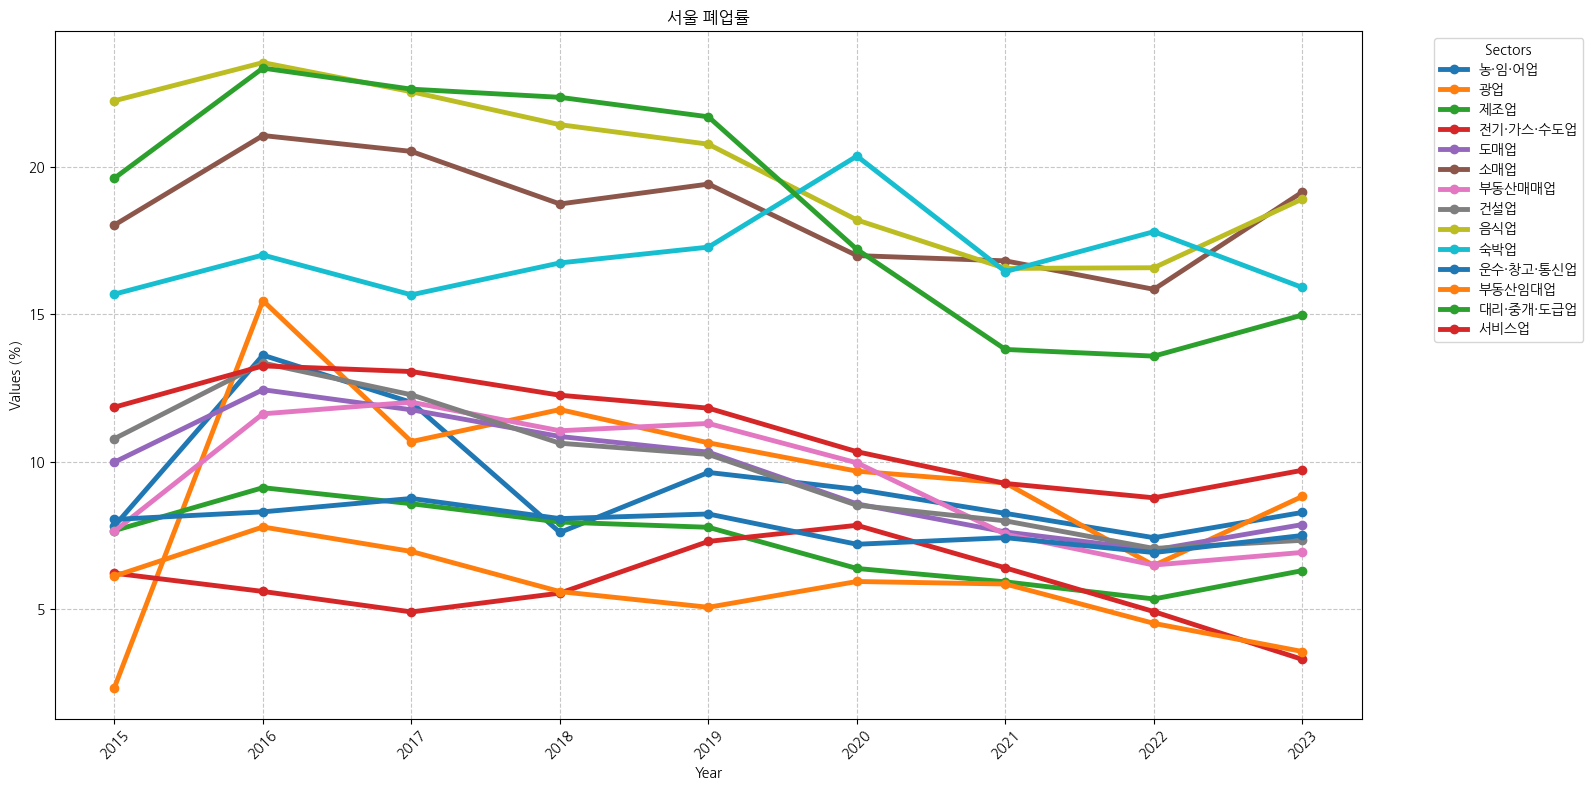

In [54]:
#서울 폐업률
seoul_total_persent["year"] = list(range(2015, 2015 + len(seoul_total_persent)))

labels = ['농·임·어업','광업','제조업','전기·가스·수도업','도매업','소매업','부동산매매업','건설업','음식업','숙박업','운수·창고·통신업','부동산임대업','대리·중개·도급업','서비스업']
n =0 
plt.figure(figsize=(16, 8))
for column in seoul_total_persent.columns[1:]: 
    plt.plot(seoul_total_persent['year'], seoul_total_persent[column], marker='o',linewidth=3.5, label=labels[n])
    n += 1
plt.title('서울 폐업률')
plt.xlabel('Year')
plt.ylabel('Values (%)')
plt.xticks(seoul_total_persent['year'], rotation=45)
plt.grid(linestyle='--', alpha=0.7)
plt.legend(title="Sectors", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

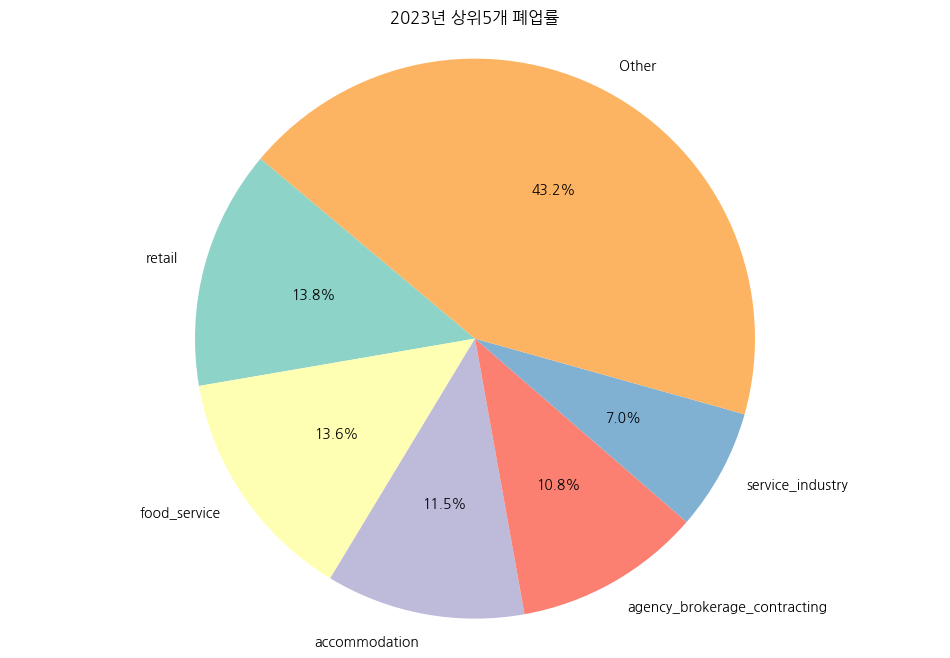

In [55]:
#파이차트 2023년 기준 상위 5개 나머지 기타
seoul_total_2023 = seoul_total_persent[seoul_total_persent['year'] == 2023].iloc[0]


sector_names = seoul_total_2023.index[1:]
sector_values = seoul_total_2023.values[1:]


sector_df = pd.DataFrame({
    'sector': sector_names,
    'value': sector_values
}).sort_values(by='value', ascending=False)


top_5_sectors = sector_df.head(5)
other_value = sector_df['value'].iloc[5:].sum()

pie_chart_data = pd.concat([top_5_sectors, pd.DataFrame({'sector': ['Other'], 'value': [other_value]})])


plt.figure(figsize=(12, 8))
colors = plt.cm.Set3.colors 

plt.pie(
    pie_chart_data['value'],
    labels=pie_chart_data['sector'],
    autopct='%1.1f%%',
    startangle=140,
    colors=colors
)

plt.title('2023년 상위5개 폐업률')
plt.axis('equal')  
plt.show()

In [56]:
seoul_df.set_index('year',inplace=True)

In [57]:
seoul_df

,agriculture_forestry_fishing,mining,manufacturing,utilities,wholesale,retail,real_estate_sales,construction,food_service,accommodation,transportation_storage_communications,real_estate_rental,agency_brokerage_contracting,service_industry
year,,,,,,,,,,,,,,
2015,38,3,7057,26,17527,31539,480,7484,28159,704,9006,25618,3089,41348
2016,66,17,8351,27,21399,36029,763,9293,29543,769,9262,33229,3794,47762
2017,64,11,7890,37,20081,35537,847,8757,28473,762,9754,31234,3912,49150
2018,45,12,7404,61,18433,33809,874,7851,27268,826,9028,28593,4040,48549
2019,58,10,7282,88,17389,37118,1122,7743,26727,869,9212,27417,3969,49411
2020,57,9,6088,96,14538,37284,1091,6682,23752,988,8146,35484,3281,45890
2021,56,9,5739,80,12992,41904,938,6503,22016,835,8576,35834,2698,44058
2022,55,7,5234,66,11958,44321,873,5899,22146,929,8124,27770,2694,44181
2023,64,9,6168,47,13224,56286,978,6195,25314,980,8861,21769,2990,50706


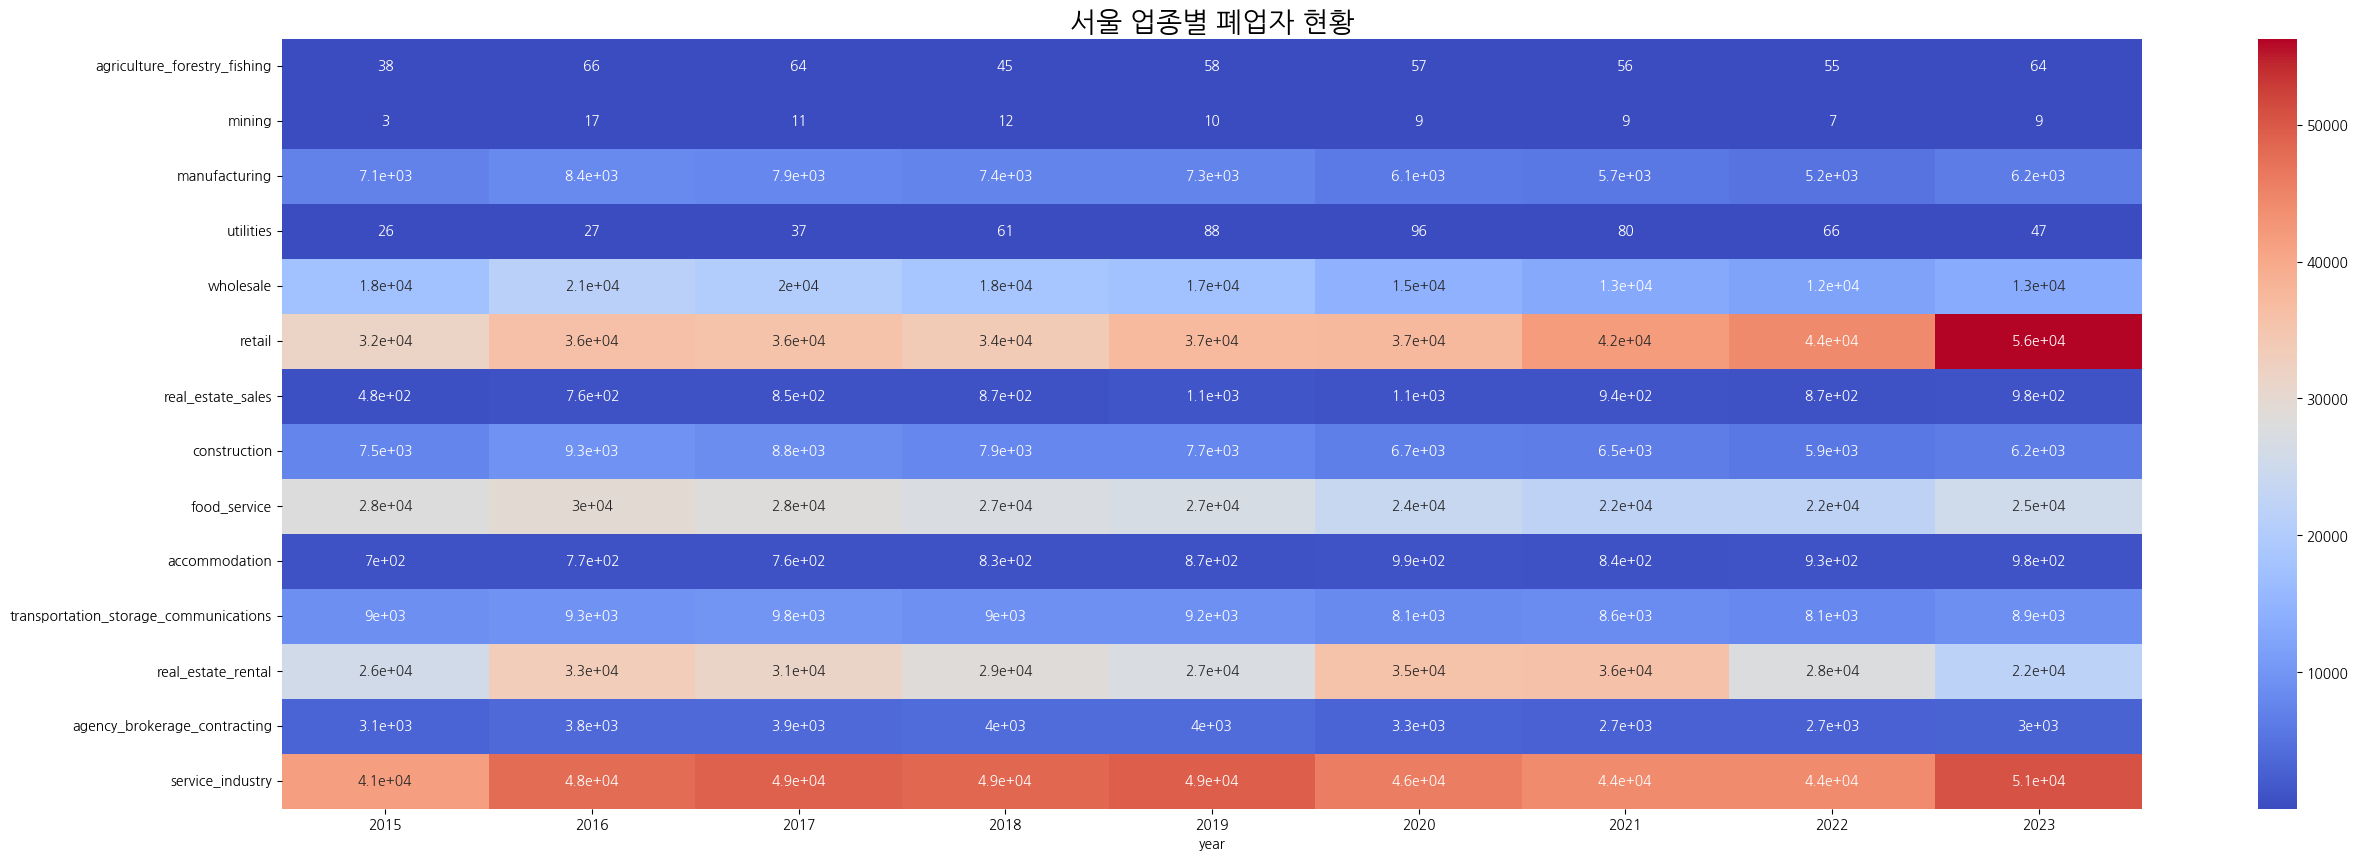

In [58]:
# 히트맵
seoul_dfX = seoul_df.astype('int')

# 히트맵 그리기
plt.figure(figsize=(30, 10))
sns.heatmap(seoul_dfX.T,annot=True, cmap='coolwarm', cbar=True)
plt.title('서울 업종별 폐업자 현황',fontsize=20)
#annot=True
plt.show()

In [59]:

#GDP 데이터 가져오기
cur.execute('select * from GDP')
rows = cur.fetchall() # 모든데이터 가져옴
print(rows)

GDP_df = pd.DataFrame(rows)

[{'year': 2004, '국내총생산': 942885, '경제성장률': 5.2}, {'year': 2005, '국내총생산': 995175, '경제성장률': 4.4}, {'year': 2006, '국내총생산': 1045663, '경제성장률': 5.2}, {'year': 2007, '국내총생산': 1134541, '경제성장률': 5.8}, {'year': 2008, '국내총생산': 1202972, '경제성장률': 3.0}, {'year': 2009, '국내총생산': 1255305, '경제성장률': 0.8}, {'year': 2010, '국내총생산': 1379460, '경제성장률': 7.0}, {'year': 2011, '국내총생산': 1448575, '경제성장률': 3.7}, {'year': 2012, '국내총생산': 1504674, '경제성장률': 2.5}, {'year': 2013, '국내총생산': 1570938, '경제성장률': 3.3}, {'year': 2014, '국내총생산': 1638484, '경제성장률': 3.2}, {'year': 2015, '국내총생산': 1740776, '경제성장률': 2.9}, {'year': 2016, '국내총생산': 1833026, '경제성장률': 3.2}, {'year': 2017, '국내총생산': 1934233, '경제성장률': 3.4}, {'year': 2018, '국내총생산': 2006974, '경제성장률': 3.2}, {'year': 2019, '국내총생산': 2040594, '경제성장률': 2.3}, {'year': 2020, '국내총생산': 2058466, '경제성장률': -0.7}, {'year': 2021, '국내총생산': 2221912, '경제성장률': 4.6}, {'year': 2022, '국내총생산': 2323781, '경제성장률': 2.7}, {'year': 2023, '국내총생산': 2401189, '경제성장률': 1.4}]


In [60]:
GDP_df

,year,국내총생산,경제성장률
0,2004,942885,5.2
1,2005,995175,4.4
2,2006,1045663,5.2
3,2007,1134541,5.8
4,2008,1202972,3.0
5,2009,1255305,0.8
6,2010,1379460,7.0
7,2011,1448575,3.7
8,2012,1504674,2.5
9,2013,1570938,3.3


In [61]:
#nationwide_hut_down 데이터 가져오기
cur.execute('select * from nationwide_shut_down ')
rows = cur.fetchall() # 모든데이터 가져옴
print(rows)

nationwide_shut_down = pd.DataFrame(rows)


[{'year': 2006, '총계': 4891, '신규': 1010, '폐업': 795}, {'year': 2007, '총계': 5005, '신규': 1135, '폐업': 894}, {'year': 2008, '총계': 5234, '신규': 1087, '폐업': 844}, {'year': 2009, '총계': 5419, '신규': 1043, '폐업': 840}, {'year': 2010, '총계': 5602, '신규': 1071, '폐업': 860}, {'year': 2011, '총계': 5772, '신규': 1083, '폐업': 897}, {'year': 2012, '총계': 5918, '신규': 1053, '폐업': 889}, {'year': 2013, '총계': 6057, '신규': 1027, '폐업': 863}, {'year': 2014, '총계': 6348, '신규': 1127, '폐업': 815}, {'year': 2015, '총계': 6702, '신규': 1191, '폐업': 790}, {'year': 2016, '총계': 6886, '신규': 1226, '폐업': 909}, {'year': 2017, '총계': 7226, '신규': 1285, '폐업': 908}, {'year': 2018, '총계': 7674, '신규': 1373, '폐업': 901}, {'year': 2019, '총계': 8046, '신규': 1316, '폐업': 922}, {'year': 2020, '총계': 8651, '신규': 1519, '폐업': 895}, {'year': 2021, '총계': 9206, '신규': 1457, '폐업': 885}, {'year': 2022, '총계': 9677, '신규': 1351, '폐업': 867}, {'year': 2023, '총계': 9950, '신규': 1276, '폐업': 986}]


In [62]:
nationwide_shut_down

,year,총계,신규,폐업
0,2006,4891,1010,795
1,2007,5005,1135,894
2,2008,5234,1087,844
3,2009,5419,1043,840
4,2010,5602,1071,860
5,2011,5772,1083,897
6,2012,5918,1053,889
7,2013,6057,1027,863
8,2014,6348,1127,815
9,2015,6702,1191,790


In [63]:
#seoul_total 데이터 가져오기
cur.execute('select * from seoul_total')
rows = cur.fetchall() # 모든데이터 가져옴
print(rows)

seoul_total_DF = pd.DataFrame(rows)

[{'year': 2015, 'agriculture_forestry_fishing': 486, 'mining': 128, 'manufacturing': 92067, 'utilities': 418, 'wholesale': 175559, 'retail': 175039, 'real_estate_sales': 6279, 'construction': 69434, 'food_service': 126679, 'accommodation': 4491, 'transportation_storage_communications': 111978, 'real_estate_rental': 418521, 'agency_brokerage_contracting': 15756, 'service_industry': 349050}, {'year': 2016, 'agriculture_forestry_fishing': 485, 'mining': 110, 'manufacturing': 91586, 'utilities': 482, 'wholesale': 172054, 'retail': 171152, 'real_estate_sales': 6566, 'construction': 69656, 'food_service': 125593, 'accommodation': 4523, 'transportation_storage_communications': 111610, 'real_estate_rental': 426727, 'agency_brokerage_contracting': 16258, 'service_industry': 360624}, {'year': 2017, 'agriculture_forestry_fishing': 533, 'mining': 103, 'manufacturing': 92020, 'utilities': 754, 'wholesale': 170803, 'retail': 173244, 'real_estate_sales': 7050, 'construction': 71400, 'food_service': 1

In [64]:
#seoul_Rating 데이터 가져오기
cur.execute('select * from seoul_Rating')
rows = cur.fetchall() # 모든데이터 가져옴
print(rows)

seoul_Rating_DF = pd.DataFrame(rows)
cur.close()
conn.close()

[{'year': 2014, 'strike_cnt': 177913, 'newcomer_cnt': 244805, 'total_business_cnt': 1481289}, {'year': 2015, 'strike_cnt': 172078, 'newcomer_cnt': 252462, 'total_business_cnt': 1545885}, {'year': 2016, 'strike_cnt': 200304, 'newcomer_cnt': 249732, 'total_business_cnt': 1557426}, {'year': 2017, 'strike_cnt': 196509, 'newcomer_cnt': 256827, 'total_business_cnt': 1601469}, {'year': 2018, 'strike_cnt': 186793, 'newcomer_cnt': 295806, 'total_business_cnt': 1696443}, {'year': 2019, 'strike_cnt': 188415, 'newcomer_cnt': 269837, 'total_business_cnt': 1764508}, {'year': 2020, 'strike_cnt': 183386, 'newcomer_cnt': 316610, 'total_business_cnt': 1884980}, {'year': 2021, 'strike_cnt': 182238, 'newcomer_cnt': 284710, 'total_business_cnt': 1973679}, {'year': 2022, 'strike_cnt': 174257, 'newcomer_cnt': 255751, 'total_business_cnt': 2041642}, {'year': 2023, 'strike_cnt': 193591, 'newcomer_cnt': 237918, 'total_business_cnt': 2071814}]


In [65]:
seoul_Rating_DF

,year,strike_cnt,newcomer_cnt,total_business_cnt
0,2014,177913,244805,1481289
1,2015,172078,252462,1545885
2,2016,200304,249732,1557426
3,2017,196509,256827,1601469
4,2018,186793,295806,1696443
5,2019,188415,269837,1764508
6,2020,183386,316610,1884980
7,2021,182238,284710,1973679
8,2022,174257,255751,2041642
9,2023,193591,237918,2071814


In [66]:
seoul_Rating_SDP = (seoul_Rating_DF['strike_cnt']/seoul_Rating_DF['total_business_cnt'])*100
seoul_Rating_NP = (seoul_Rating_DF['newcomer_cnt']/seoul_Rating_DF['total_business_cnt'])*100

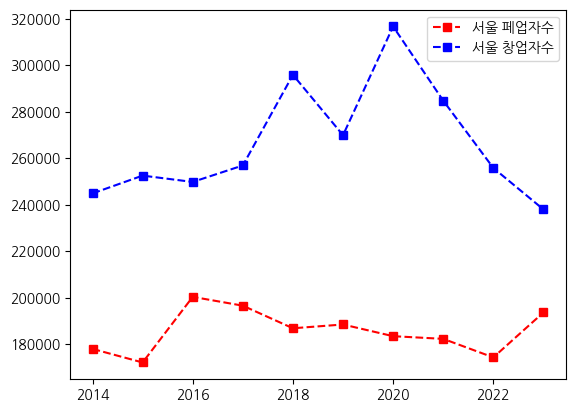

In [85]:
seoul_Rating_shut_down_DF = pd.DataFrame(data=seoul_Rating_DF['strike_cnt'], index=seoul_Rating_DF['year'], columns=['폐업자수'])
seoul_Rating_Startups_DF = pd.DataFrame(data=seoul_Rating_DF['newcomer_cnt'], index=seoul_Rating_DF['year'], columns=['창업자수'])

# 서울 연도별 폐업자, 창업자수
plt.plot(seoul_Rating_DF['year'], seoul_Rating_DF['strike_cnt'], label='서울 페업자수', marker='s', color='r', linestyle='dashed')
plt.plot(seoul_Rating_DF['year'], seoul_Rating_DF['newcomer_cnt'], label='서울 창업자수', marker='s', color='b', linestyle='dashed')

plt.legend()
plt.show()

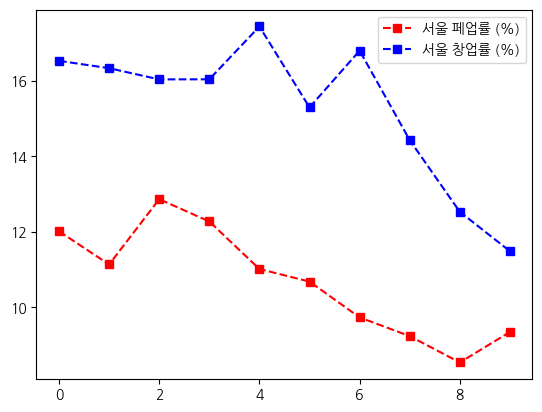

In [87]:
# 서울 연도별 폐업률, 창업률
plt.plot(seoul_Rating_DF.index, seoul_Rating_SDP , label='서울 페업률 (%)', marker='s', color='r', linestyle='dashed')
plt.plot(seoul_Rating_DF.index, seoul_Rating_NP, label='서울 창업률 (%)', marker='s', color='b', linestyle='dashed')

plt.legend()
plt.show()

In [69]:
seoul_Rating_Startups_DF

,창업자수
year,
2014,NaN
2015,NaN
2016,NaN
2017,NaN
2018,NaN
2019,NaN
2020,NaN
2021,NaN
2022,NaN


In [70]:
seoul_Rating_shut_down_DF

,폐업자수
year,
2014,NaN
2015,NaN
2016,NaN
2017,NaN
2018,NaN
2019,NaN
2020,NaN
2021,NaN
2022,NaN


In [71]:
nationwide_shut_down

,year,총계,신규,폐업
0,2006,4891,1010,795
1,2007,5005,1135,894
2,2008,5234,1087,844
3,2009,5419,1043,840
4,2010,5602,1071,860
5,2011,5772,1083,897
6,2012,5918,1053,889
7,2013,6057,1027,863
8,2014,6348,1127,815
9,2015,6702,1191,790


In [72]:
shut_down = (nationwide_shut_down['폐업']/nationwide_shut_down['총계'])*100
shut_down.values

array([16.25434471, 17.86213786, 16.12533435, 15.50101495, 15.35166012,
       15.54054054, 15.02196688, 14.24797755, 12.83868935, 11.78752611,
       13.20069707, 12.56573485, 11.74094345, 11.45911012, 10.34562478,
        9.61329568,  8.95938824,  9.90954774])

In [73]:
Startups = (nationwide_shut_down['신규']/nationwide_shut_down['총계'])*100

In [74]:
Startups

0     20.650174
1     22.677323
2     20.768055
3     19.247094
4     19.118172
5     18.762994
6     17.793173
7     16.955589
8     17.753623
9     17.770815
10    17.804240
11    17.783006
12    17.891582
13    16.355953
14    17.558664
15    15.826635
16    13.960938
17    12.824121
dtype: float64

In [75]:
nationwide_shut_down

,year,총계,신규,폐업
0,2006,4891,1010,795
1,2007,5005,1135,894
2,2008,5234,1087,844
3,2009,5419,1043,840
4,2010,5602,1071,860
5,2011,5772,1083,897
6,2012,5918,1053,889
7,2013,6057,1027,863
8,2014,6348,1127,815
9,2015,6702,1191,790


In [76]:
shut_down_persent = pd.DataFrame(data=shut_down.values, index=nationwide_shut_down['year'], columns=['폐업률'])
Startups_DF = pd.DataFrame(data=Startups.values, index=nationwide_shut_down['year'], columns=['창업률'])

In [77]:
shut_down_persent

,폐업률
year,
2006,16.254345
2007,17.862138
2008,16.125334
2009,15.501015
2010,15.351660
2011,15.540541
2012,15.021967
2013,14.247978
2014,12.838689


In [78]:
Startups_DF

,창업률
year,
2006,20.650174
2007,22.677323
2008,20.768055
2009,19.247094
2010,19.118172
2011,18.762994
2012,17.793173
2013,16.955589
2014,17.753623


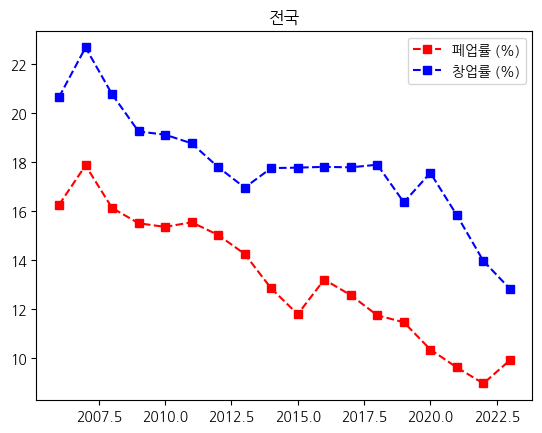

In [83]:
shut_down_persent

# 전국 연도별 폐업률
plt.plot(shut_down_persent.index, shut_down_persent, label='페업률 (%)', marker='s', color='r', linestyle='dashed')
plt.plot(Startups_DF.index, Startups_DF, label='창업률 (%)', marker='s', color='b', linestyle='dashed')

plt.title('전국')
plt.legend()
plt.show()

In [80]:
shut_down

0     16.254345
1     17.862138
2     16.125334
3     15.501015
4     15.351660
5     15.540541
6     15.021967
7     14.247978
8     12.838689
9     11.787526
10    13.200697
11    12.565735
12    11.740943
13    11.459110
14    10.345625
15     9.613296
16     8.959388
17     9.909548
dtype: float64

In [81]:
GDP_df.set_index('year',inplace=True)

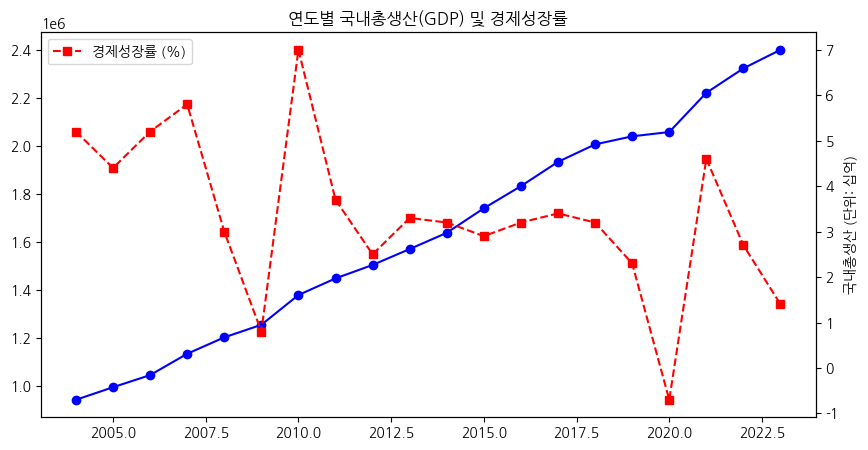

In [82]:
# GDP 그래프 그리기
# X 축에 인덱스 년도 

# 그래프 크기 설정
plt.figure(figsize=(10, 5))

# 국내총생산(GDP) 선 그래프
plt.plot(GDP_df.index, GDP_df['국내총생산'], label='국내총생산 (GDP)', marker='o', color='b')

# 경제성장률 선 그래프 (y축 오른쪽)
plt.twinx()  # 두 번째 y축 생성
plt.plot(GDP_df.index, GDP_df['경제성장률'], label='경제성장률 (%)', marker='s', color='r', linestyle='dashed')

# 제목 및 레이블
plt.title('연도별 국내총생산(GDP) 및 경제성장률')
plt.xlabel('연도')
plt.ylabel('국내총생산 (단위: 십억)')
plt.legend(loc='upper left')

plt.show()